In [1]:
import torch
from transformers import AutoTokenizer, AutoModel
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import json

# 모델과 토크나이저 로드
def load_model():
    tokenizer = AutoTokenizer.from_pretrained("BAAI/bge-m3")
    model = AutoModel.from_pretrained("BAAI/bge-m3")
    return tokenizer, model

# 텍스트에 대한 임베딩 벡터 가져오기
def get_embedding(text, tokenizer, model):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    
    # [CLS] 토큰 임베딩을 문장 임베딩으로 사용
    return outputs.last_hidden_state[:, 0, :].numpy()[0]

# 딕셔너리들의 임베딩 시각화
def visualize_embeddings(dict_list, method='pca', save_path=None):
    tokenizer, model = load_model()
    
    # 임베딩과 메타데이터를 저장할 리스트
    all_embeddings = []
    all_labels = []
    all_texts = []
    
    # 딕셔너리의 각 항목에 대한 임베딩 구하기
    for dict_idx, data_dict in enumerate(dict_list):
        for key, text in data_dict.items():
            embedding = get_embedding(text, tokenizer, model)
            all_embeddings.append(embedding)
            all_labels.append(f"{dict_idx}_{key}")
            all_texts.append(f"Dict {dict_idx}, {key}: {text}")
    
    # 배열로 변환
    embedding_array = np.array(all_embeddings)
    
    # 차원 축소 (PCA 또는 t-SNE)
    if method.lower() == 'pca':
        reducer = PCA(n_components=2)
    else:
        raise ValueError("현재는 'pca' 방법만 지원합니다")
    
    reduced_embeddings = reducer.fit_transform(embedding_array)
    
    # 임베딩 시각화
    plt.figure(figsize=(12, 10))
    
    # 딕셔너리별 색상 정의
    num_dicts = len(dict_list)
    colors = plt.cm.tab10(np.linspace(0, 1, num_dicts))
    
    # 키별 마커 정의
    markers = {'EtoK': 'o', 'KtoE': 's', 'English': '^', 'Korean': 'D'}
    
    # 각 점 그리기
    for i, label in enumerate(all_labels):
        dict_idx, key = label.split('_')
        dict_idx = int(dict_idx)
        
        plt.scatter(
            reduced_embeddings[i, 0], 
            reduced_embeddings[i, 1], 
            color=colors[dict_idx],
            marker=markers.get(key, 'o'),
            s=100
        )
        
        plt.annotate(
            key, 
            (reduced_embeddings[i, 0], reduced_embeddings[i, 1]),
            fontsize=10
        )
    
    plt.title(f"BGE-M3 임베딩 시각화 ({method.upper()})")
    plt.xlabel("차원 1")
    plt.ylabel("차원 2")
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # 커스텀 범례 생성
    legend_elements = []
    
    # 딕셔너리 범례
    for i in range(num_dicts):
        legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', 
                                         label=f"Dictionary {i}", 
                                         markerfacecolor=colors[i], markersize=10))
    
    # 키 범례
    for key, marker in markers.items():
        legend_elements.append(plt.Line2D([0], [0], marker=marker, color='black', 
                                         label=key, markersize=10))
    
    plt.legend(handles=legend_elements, loc='upper right')
    
    # 그래프 아래에 원문 텍스트 추가
    plt.figtext(0.1, 0.01, '\n'.join(all_texts), wrap=True, fontsize=9)
    
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.3)  # 텍스트를 위한 하단 여백 조정
    
    # 저장 경로가 주어진 경우 그림 저장
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    plt.show()


c:\Users\wjdrb\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
with open("C:/Users/wjdrb/multilingual_embeddings/code-switch.json", "r", encoding="UTF-8") as f:
	dict_list = json.load(f)


In [14]:
dict_list

[{'EtoK': 'Could you explain how 양자 컴퓨팅 and 양자 얽힘 make it possible to solve certain problems faster than classical methods?',
  'KtoE': '고전적 방식보다 더 효율적인 quantum computing과 quantum entanglement의 핵심 원리는 무엇인가요?',
  'English': 'Could you explain how quantum computing and quantum entanglement make it possible to solve certain problems faster than classical methods?',
  'Korean': '양자 컴퓨팅과 양자 얽힘이 일부 문제를 고전적 방법보다 더 빠르게 해결하도록 만드는 핵심 원리는 무엇인가요?'},
 {'EtoK': 'Can you describe how 생성적 적대 신경망 uses both a 생성기 and a 판별기 to produce realistic images?',
  'KtoE': 'GAN이 generator와 discriminator를 동시에 활용해 사실적인 이미지를 만들어 내는 과정을 설명해 주실 수 있나요?',
  'English': 'Can you describe how Generative Adversarial Networks use both a generator and a discriminator to produce realistic images?',
  'Korean': '생성적 적대 신경망은 생성기와 판별기를 어떻게 활용하여 사실적인 이미지를 생성하나요?'},
 {'EtoK': 'Could you explain how 자가 치유 소재 with embedded 촉매 물질 can automatically repair cracks?',
  'KtoE': 'Self-healing materials이 내부에 포함된 catalyst agent를 통해 균열을 자동으로 

c:\Users\wjdrb\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_35648\1423189122.py:105: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_35648\1423189122.py:105: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_35648\1423189122.py:105: UserWarning: Glyph 51076 (\N{HANGUL SYLLABLE IM}) missing from current font.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_35648\1423189122.py:105: UserWarning: Glyph 48288 (\N{HANGUL SYLLABLE BE}) missing from c

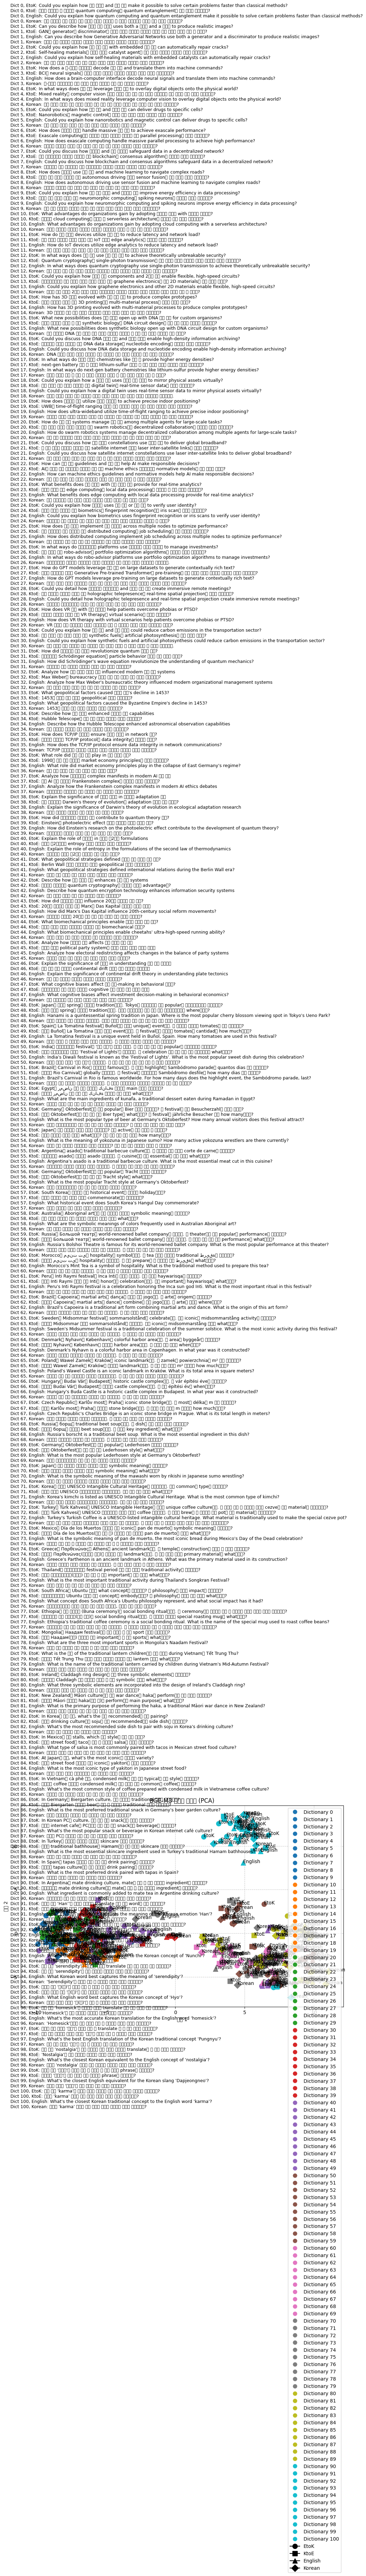

KeyboardInterrupt: 

In [15]:

# PCA를 사용한 임베딩 시각화
visualize_embeddings(dict_list, method='pca', save_path='embeddings_pca.png')